In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

people = pd.read_csv("salarios.csv")
people

,edad,estudio,horas,clase_salario,valor_salario
0,27,9,40,0,12967.33
1,30,9,40,0,20171.40
2,42,9,40,1,39051.04
3,68,9,25,1,33567.25
4,34,8,40,0,8247.42
...,...,...,...,...,...
95,32,13,55,0,3297.72
96,20,10,25,0,2266.79
97,46,3,40,0,17190.41
98,37,9,45,0,552.72


In [14]:
#sampling

for  i in range(5):
  print(people.sample(frac=1/10), "\n")

    edad  estudio  horas  clase_salario  valor_salario
55    30       10     40              0        5266.42
78    52       16     70              1       38094.64
19    31       13     40              0        5514.84
46    44       10     32              0       15689.97
81    34       10     72              1       38097.13
59    42        9     40              0       14209.41
71    25        5     40              0       17190.41
41    27        7     40              1       27872.31
79    33        9     55              0        7520.80
30    20        9     40              0        2285.43 

    edad  estudio  horas  clase_salario  valor_salario
89    53        9     40              1      42280.460
5     26       13     50              0       6769.345
85    46       10     50              0      17202.830
28    30        9     60              0       5291.260
74    29        9     45              0       9495.710
96    20       10     25              0       2266.790
77    19

In [15]:
#scaling data
people = MinMaxScaler().fit_transform(people)
people

array([[0.15873016, 0.53333333, 0.54929577, 0.        , 0.2510676 ],
       [0.20634921, 0.53333333, 0.54929577, 0.        , 0.39675954],
       [0.3968254 , 0.53333333, 0.54929577, 1.        , 0.77857306],
       [0.80952381, 0.53333333, 0.33802817, 1.        , 0.66767131],
       [0.26984127, 0.46666667, 0.54929577, 0.        , 0.15561422],
       [0.14285714, 0.8       , 0.69014085, 0.        , 0.12572228],
       [0.0952381 , 0.2       , 0.33802817, 0.        , 0.03466478],
       [0.04761905, 0.6       , 0.54929577, 0.        , 0.33647331],
       [0.06349206, 0.6       , 0.1971831 , 0.        , 0.03441342],
       [0.38095238, 0.6       , 0.54929577, 0.        , 0.26111527],
       [0.50793651, 0.13333333, 0.26760563, 0.        , 0.38118558],
       [0.22222222, 0.6       , 0.54929577, 0.        , 0.1103994 ],
       [0.77777778, 0.66666667, 0.4084507 , 1.        , 0.66779689],
       [0.65079365, 0.53333333, 0.54929577, 1.        , 0.5173322 ],
       [0.26984127, 0.8       , 0.

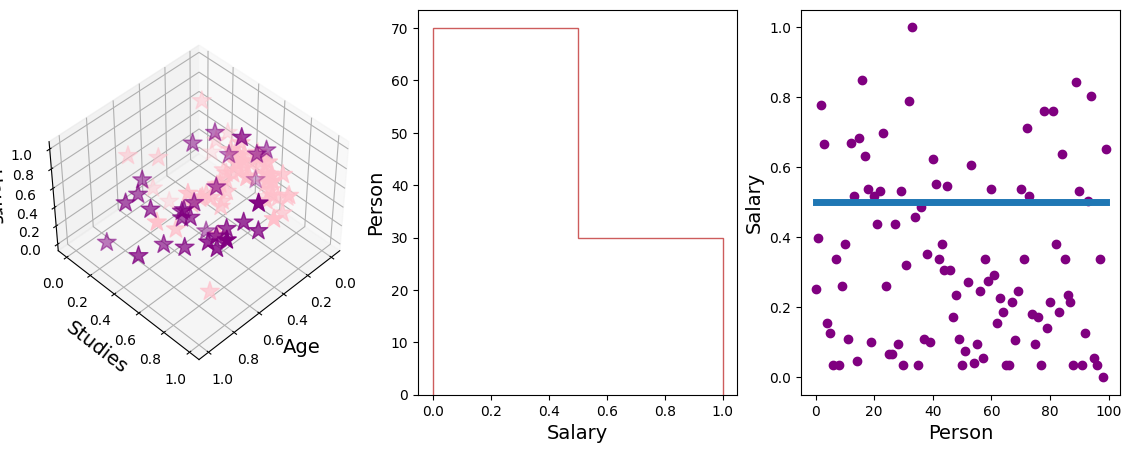

In [26]:
#preview of our data
fig = plt.figure(figsize=(14,5))

#graphic of dispersion  -> Age, Studies & hours
ax = fig.add_subplot(1,3,1, projection="3d")
colors = ("pink", "purple")

for clase in (0,1):
  ax.scatter(people.T[0][people.T[3]==clase],
             people.T[1][people.T[3]==clase],
             people.T[2][people.T[3]==clase],
             marker="*", c=colors[clase], s=200
             )

ax.set_xlabel("Age", size=14)
ax.set_ylabel("Studies", size=14)
ax.set_zlabel("Hours", size=14)
ax.view_init(45,45)

#histogram -> salary class
ax = fig.add_subplot(1,3,2)
ax.hist(people.T[3], bins=2, histtype="step", color="indianred")
ax.set_xlabel("Salary", size=14)
ax.set_ylabel("Person", size=14)
#plt.step(ax.spines.values(), linewidth=0)

#view of salary of people
ax = fig.add_subplot(1,3,3)
ax.plot(people.T[4], marker="o", linewidth=0, color="purple")
ax.plot([0.5]*100, linewidth = 5)
ax.set_ylabel("Salary", size=14)
ax.set_xlabel("Person", size=14)
#plt.step(ax.spines.values(), linewidth=0)
plt.show()

In [40]:
#cration of metamodels by Bagging techniques
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


#separating feautres from objective varibales
data = people.T[:-2].T    #features
clase = people.T[3]       #salary class
valor = people.T[4]       #Numeric salary

#Base Classifier and Base regresor
myClassifier = KNeighborsClassifier(n_neighbors=3)
regresor = KNeighborsRegressor(n_neighbors=3)

n = 50 #num of model 1vs 50

#Bagging models for classifier and regresion with 30% of sample
meta_classifier = BaggingClassifier(base_estimator=myClassifier,
                                    n_estimators=n,
                                    max_samples=0.30).fit(data, clase)

meta_regresor = BaggingRegressor(base_estimator=regresor,
                                 n_estimators=n,
                                 max_samples=0.30).fit(data, valor)


#relevant metrics to clasification and determination
print("Accuracy:",
      accuracy_score(clase, meta_classifier.predict(data)))
print("Coefficient:",
      r2_score(valor, meta_regresor.predict(data)))

Accuracy: 0.84
Coefficient: 0.3093186892905435


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
